# Final Assignment
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Krista Miller

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Question 1 - Python

### 8 points

By now you should be quite familiar with Pandas' DataFrame object and how to use it. Here you will define an extremely simplified version of this class, designed only to mimic the string output that is given by outputting a Pandas DataFrame or a column from a Pandas DataFrame.

Define a class called SimpleDataFrame. The constructor (`__init__`) should expect the data to be given as a list of lists and the columns as a list of strings. Here is an example instantiation:

```python
df = SimpleDataFrame(
  data=[[5, 2, 3, 6, 9], [1, 8, 2, 6, 3], [1, 9, 2, 2, 4]], 
  columns=["col1", "col2", "col3"]
)
```

The data and columns should be stored as instance variables. The approach with which you choose to represent the data and columns is up to you, but you should consider how you may want to store this information and any additional information in order to complete the following two methods.

Define the `__str__(self)` method that returns an string representation of the data frame. This should look similar to the output provided by Pandas' DataFrame object, with an RangeIndex as the left-most column and with the data arranged as columns below its corresponding column names. Here is an example output from running `print(df)` given the `df` variable above:

```
  col1  col2  col3
0 5     1     1
1 2     8     9
2 3     2     2
3 6     6     2
4 9     3     4
```

Your output does not need to match this perfectly, but should be similar and readable.

Define a `__getitem__(self, key)` method for this class. `__getitem__` is a dunder/magic method that allows you to use the `[]` syntax on an instance of the class. For a data frame, we would normally expect `df['col1']`, if `df` was a Pandas DataFrame, to return a Pandas Series object representing that column. Since we are only mimicking the output and not also defining Series, `__getitem__` should only return a string, much like `__str__`, but such that only the given column is represented. For example, `print(df['col2'])` should output something like:

```
col2
1
8
2
6
3
```

Run the provided code cell with the example code to test your class.


In [2]:
data_dict = dict()

class SimpleDataFrame:
    
    def __init__(self, data, columns):
        self.data = data
        self.columns = columns
        self.max = len(data)
        for x in range(len(self.data)):
            data_dict[self.columns[x]] = self.data[x]
    
    def __str__(self):
        
        string = ""
       
        # column features:
        features = data_dict.keys()
        z = len(data_dict)*"{:<4} " #creates as many columns as there are column names
        string = string + z.format(*(features)) + "\n"

        rows = list(data_dict.values())

        for j in range(0,5):
            for i in range(0, len(data_dict)):
                if i == len(data_dict) - 1:
                    string = string + "".join(str(rows[i][j]).ljust(5)) + "\n"
                else:
                    string = string + "".join(str(rows[i][j]).ljust(5))

        return string
        
    def __getitem__(self, val):
        string = val + "\n"
        for i in data_dict[val]:
            string = string + str(i) + "\n"
        
        return string
    

In [3]:
# Run this to test your SimpleDataFrame class
df = SimpleDataFrame(data=[[5, 2, 3, 6, 9], [1, 8, 2, 6, 3], [1, 9, 2, 2, 4]], columns=["col1", "col2", "col3"])
print(df)
print()
print(df["col2"])

col1 col2 col3 
5    1    1    
2    8    9    
3    2    2    
6    6    2    
9    3    4    


col2
1
8
2
6
3



# Question 2 - Algorithm Analysis

It is typical in a coding interview to be asked to write a method that computes some output based on some input, often a string or array. It is also typical to be asked to analyze the runtime (and space) complexity of your answer. The question you will answer is as follows:
> Given an array of integer values and a target value $q$, write a method that determines if there exists a pair of elements in the array that sum to $q$.

For example, this method would return `True` for the array `[5, 2, 7, 8, 3, 4]` and `q=11` since 7 and 4, both present in the array, sum to 11. Moreover, 8 and 3 also sum to 11. It does not matter what two values are part of the sum, only that such a pair exists. Given the same array but with `q=4`, the method would return `False` because although 4 (the value of $q$) and 2 (adding 2 to itself sums to $q$) are in the array, no two distinct values sum to 4.

Your task for parts (a) and (b) is to define two different answers to this question, then analyze their runtime. Below is a code cell defining a method called `test_method` that will run a handful of test cases for the methods you define. Go ahead and run this code cell so you'll have the method available to you for testing.

In [4]:
def test_method(method):
    nums = [7, -4, 60, 17, 31, 100, -50]

  # Test normal cases
    assert method(nums, 117)
    assert method(nums, -19)
    assert not method(nums, 14)
    assert not method(nums, 200)

  # Test edge cases
    assert not method([], 42)
    assert not method([50], 50)
    assert not method([50], 100)
    assert method([2, 2], 4)

    print("Tests passed successfully")

**For parts (a) and (b), define the method based on the given instructions, then analyze the runtime of your implementation in a docstring comment just below the header of the method.** Upon calling `test_method` with your method, you will get an AssertionError if you failed any test, or otherwise get a confirmation message if you passed all tests.

## Part (a)

### 6 points

Define a method called `method1` that solves this question in a brute-force manner. Iterate over all possible pairs of elements in the given array, each time checking if their sum is equal to $q$. If any pair's sum is $q$, return True. If no pairs sum to $q$, return False.

Test your method using the provided `test_method`.

Analyze the runtime of `method1` in the docstring using Big-Oh notation. Provide a brief explanation for why the runtime is what you state.

In [5]:
def method1(A, x) :
    for i in range (0, len(A) - 1) :
        for j in range (i + 1, len(A)):
            if (A[i] + A[j] == x) :
                return True
    return False

test_method(method1)

#The runtime complexity is O(n^2).  There are n iterations in the first loop and n iterations 
# in the second loop. O(n*n)= O(n^2)  

Tests passed successfully


## Part (b)

### 6 points

Define a method called `method2` that solves this question using sorting. Start by sorting the array first. Create two indexes called `left` and `right`. `left` will start at 0 and `right` at the last index of the array. (For this to work, you cannot be fancy with Python's syntax and use `-1` for `right`; use the *positive integer* that is the last index.) So long as `left` is strictly less than `right`, check the following:
* If the elements at `left` and `right` sum to `q`, return True.
* If their sum is less than `q`, *increment* `left` by 1.
* If their sum is greater than `q`, *decrement* `right` by 1.

The big picture is that `left` and `right` move inward toward the middle of the array and take advantage of the fact that the array is sorted in order to find a pair of elements that sum to `q`.

Test your method using the provided `test_method`.

Analyze the runtime of `method2` in the docstring using Big-Oh notation. Provide a brief explanation for why the runtime is what you state. Assume that the sorting methods provided by Python run in O(n log n) time.

In [6]:
def method2(A, x):
    sorted_array = sorted(A)
    left=0
    right= len(A)-1
    
    while left<right:
        if (sorted_array[left] + sorted_array[right] == x):
            return True
        elif (sorted_array[left] + sorted_array[right] < x):
            left += 1
        else:
            right -= 1
    return 0

test_method(method2)

#The runtime complexity is O(nlogn).  

Tests passed successfully


# Question 3 - Data Manipulation

The WTA dataset used in this question is also used for Question 4.

## Part (a)

### 3 points

Import the two .csv files on matches from the Women's Tennis Association tour in 2019 and 2020, either from the following URLs or by downloading the files from Canvas and loading them from your local repository.
* https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2019.csv
* https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_2020.csv

Combine these two datasets into one by stacking them together, placing the 2020 data below the 2019 data. Ensure that the index values for the 2020 are adjusted to continue off of the 2019 index.

There are many columns that we can ignore for these questions. Keep just the following columns: `'tourney_name', 'surface', 'match_num', 'winner_name', 'winner_rank', 'winner_ht', 'w_1stIn', 'loser_name', 'loser_rank', 'loser_ht', 'l_1stIn'`. Print the **shape** and **tail** of the combined dataset.


In [7]:
wta19 = pd.read_csv('wta_matches_2019.csv')
wta20 = pd.read_csv('wta_matches_2020.csv')
wta_combined = pd.concat([wta19, wta20], axis=0, ignore_index= True)

In [8]:
columns= ['tourney_name', 'surface', 'match_num', 'winner_name', 'winner_rank', 'winner_ht', 'w_1stIn', 'loser_name', 'loser_rank', 'loser_ht', 'l_1stIn']

wta_trim = wta_combined[columns]
display(wta_trim.tail(5))
print(wta_trim.shape)

,tourney_name,surface,match_num,winner_name,winner_rank,winner_ht,w_1stIn,loser_name,loser_rank,loser_ht,l_1stIn
4092,Fed Cup QLS R1: SUI vs CAN,Hard,4,Jil Belen Teichmann,68.0,170.0,39.0,Gabriela Dabrowski,448.0,NaN,50.0
4093,Fed Cup QLS R1: USA vs LAT,Hard,1,Sofia Kenin,7.0,170.0,33.0,Anastasija Sevastova,41.0,169.0,40.0
4094,Fed Cup QLS R1: USA vs LAT,Hard,2,Serena Williams,9.0,175.0,39.0,Jelena Ostapenko,40.0,177.0,48.0
4095,Fed Cup QLS R1: USA vs LAT,Hard,3,Jelena Ostapenko,40.0,177.0,49.0,Sofia Kenin,7.0,170.0,47.0
4096,Fed Cup QLS R1: USA vs LAT,Hard,4,Anastasija Sevastova,41.0,169.0,75.0,Serena Williams,9.0,175.0,60.0


(4097, 11)


## Part (b)
### 2 points

Suppose we want to get information on the final match of Wimbledon in 2019 (the 2020 event was cancelled due to the pandemic). Extract the rows that contain the matches from the `'Wimbledon'` tournament, then from those extract the final match. Note that `match_num`, as noted by the author of this dataset, is a value that is inconsistent across tournaments, sometimes starting from 1 and going up, other times counting down. Knowing that Serena Williams is perhaps the greatest tennis player to ever live (moreover one of the greatest athletes), check the data for yourself to determine if you should use the minimum `match_num` or maximum. (Serena did end up losing this match, but she's still one of the greats.)

You must programmatically extract the row in question. In other words, you will not receive credit if you find the correct row and hard-code your answer.

In [9]:
df = wta_trim[wta_trim['tourney_name'].str.contains("Wimbledon")]

final_wimbledon_match= df[df['match_num'] == df['match_num'].max()]

display(final_wimbledon_match)

,tourney_name,surface,match_num,winner_name,winner_rank,winner_ht,w_1stIn,loser_name,loser_rank,loser_ht,l_1stIn
1671,Wimbledon,Grass,226,Simona Halep,7.0,168.0,35.0,Serena Williams,10.0,175.0,32.0


## Part (c)

### 4 points

A quick scan of the data should show you that many of the players' heights are missing from the dataset. To get an idea of how much of this data is missing, first determine how many *unique* players are represented in this dataset by combining the players under the columns `'winner_name'` and `'loser_name'`. (There is a particular operation used to combine these columns. If you don't already know the right method to call, search the internet for an answer or ask your peers/instructor.)

Then, calculate for how many unique players the corresponding height column is missing. Height is given by `'winner_ht'` and `'loser_ht'`, both in centimeters.

Compute the ratio of players with missing heights over total number of players to get a percentage of players with currently unknown (i.e. unrecorded) heights.

In [10]:
names = wta_trim[["winner_name", "loser_name"]].values.ravel()
heights = wta_trim[["winner_ht", "loser_ht"]].values.ravel()

df = pd.DataFrame({'Names':names, 'Heights':heights}).sort_values(by=['Heights'])

# drop duplicates:
df2 = df.drop_duplicates(['Names'])

# print(df2.shape[0]) #row number of total number of unique players 

height_missing = sum(df2['Heights'].isna()) 
# print(height_missing)

print('ratio of players with missing heights over total number of players: ')
print(height_missing/df2.shape[0])


ratio of players with missing heights over total number of players: 
0.6939203354297694


## Part (d)

### 4 points

Given that the player ranks are provided in this dataset, we might be curious to see what a typical match-up is like regarding ranking. Are players of similar rank often paired against each other? Or is player rank perhaps not necessarily used to determine who is matched with whom?

To briefly study these questions, plot a scatterplot of `'loser_rank'` versus `'winner_rank'`. To make the plot a little more interesting, change the color of the data points depending on the `'surface'` being played on.

Using in-line comments in your code cell or as a separate text cell, **provide at least three statements** regarding the plot you created, noting any trends, patterns, outliers, things that may require more exploration, statistical questions that could be interesting to answer, or anything else that stands out to you. You might consider enlarging the plot to get a better look.

Text(0.5, 1.0, 'Loser Rank vs. Winner Rank by playing surface')

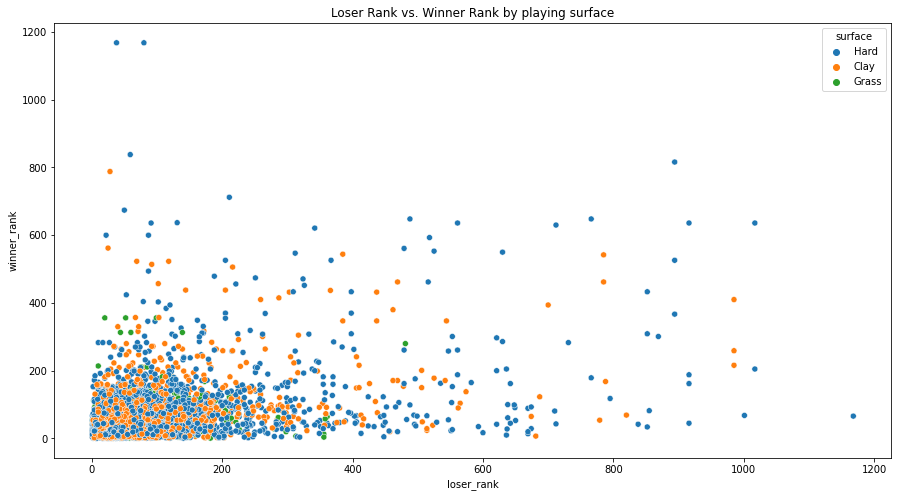

In [13]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=wta_trim, x="loser_rank", y="winner_rank", hue="surface").set_title("Loser Rank vs. Winner Rank by playing surface")


#1. The highest concentration of players is between the rank of 0-200 for winners and losers
#2. There are outliers in the upper R area of the graph that should be explored- were there truly games that had a winner rank
# of 650 and a loser rank of 750?  Several outliers are in that area, with a hard surface.  Are those outliers from the 
# same tournament?  Could it be a error in how the rankings are recorded?
#3. What is the distribution of games by playing surface?  Are there more games that are played on hard and clay surfaces
# than grass in the WTA? 
#4. A sankey diagram of games by tournament that funnels toward the winner would be an interesting visualization. 

# Question 4 - Hypothesis Testing

Using the WTA dataset from the previous questions, we will perform a hypothesis test on one aspect of the data. 

In case you are unfamiliar with the gameplay rules of tennis, each player alternates serving the ball to start each rally. Players get two shots to make the service shot into the correct box on the opponent's side of the court, the service box diagonally opposite from the server. As such, players typically hit the first serve pretty hard (for female tennis players, commonly around 100mph-115mph at the professional level) since they have a second chance if they miss.

Suppose you speculate that players that end up winning their matches likely have more serves that make it in on the first attempt. After all, a harder serve is harder to return and gives the serving player better control of the rally. To answer this, you propose a t-test to determine if there is a *significant difference between the means* of the sampling distributions of number of first serves in for winners versus that of losers. These values correspond to the `'w_1stIn'` and `'l_1stIn'` columns.

## Part (a)

### 2 points

To start, state the null and alternative hypotheses either as commented code or in a text cell below using the conventional notation.

Null: There is no siginificant difference between the means of the sampling distributions of number of first serves for winners versus that of losers. 

Alternative: There is a siginificant difference between the means of the sampling distributions of number of first serves for winners versus that of losers. 


## Part (b)
### 2 points

Plot distribution plots of the `'w_1stIn'` and `'l_1stIn'` columns. Along with each plot, print the **mean** and **skew** of each column. Include an in-line comment stating if the plot is approximately normal or not.

skew:  0.5768280678699269 : skew is between -1 and 1, distribution of winner 1st in data is normal
winner 1st in mean:  43.94060876020787
skew:  0.5550471425244557 : skew is between -1 and 1, distribution of winner 1st in data is normal
lower 1st in mean:  44.3155159613957


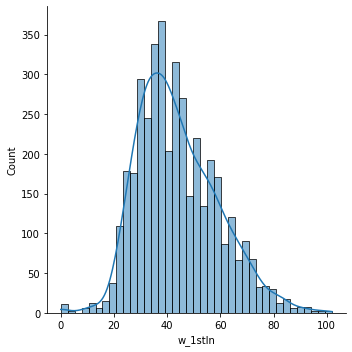

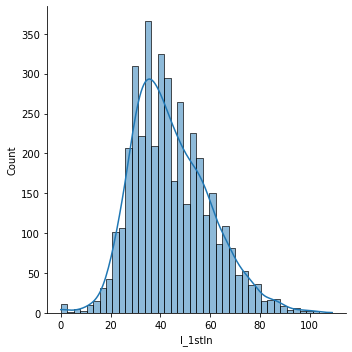

In [14]:
sns.displot(wta_combined, x="w_1stIn", kde= True)
print("skew: ", wta_combined.w_1stIn.skew(), ": skew is between -1 and 1, distribution of winner 1st in data is normal")
print("winner 1st in mean: ", wta_combined.w_1stIn.mean())

sns.displot(wta_combined, x="l_1stIn", kde= True)
print("skew: ", wta_combined.l_1stIn.skew(), ": skew is between -1 and 1, distribution of winner 1st in data is normal")
print("lower 1st in mean: ", wta_combined.l_1stIn.mean())

## Part (c)
### 2 points

Perform a Levene's Test on these two columns to determine if the variance of each are roughly equal or not. Note that each column has missing values, so you should drop those values in order to get actual results from the test. Your output should provide an alpha value (assumed to be 0.05), a p-value, a test statistic, and statement that the variance is either close to equal or not.

In [15]:
from scipy import stats

wta_combined_t_test = wta_combined.dropna(subset=['w_1stIn', 'l_1stIn'])
    
display(wta_combined_t_test.head(5))

test_stat, p_value = stats.levene(wta_combined_t_test['w_1stIn'], wta_combined_t_test['l_1stIn'])
alpha = 0.05

if p_value > alpha:
    print("Retain H0 - variance is roughly equal")
else:
    print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-0300,Luxembourg,Hard,32,I,20191014,270,201504,2.0,NaN,...,73.0,38.0,16.0,14.0,17.0,24.0,26.0,1840.0,74.0,803.0
1,2019-0300,Luxembourg,Hard,32,I,20191014,271,201514,NaN,NaN,...,30.0,20.0,8.0,9.0,2.0,6.0,76.0,793.0,122.0,538.0
2,2019-0300,Luxembourg,Hard,32,I,20191014,272,201697,NaN,NaN,...,50.0,35.0,8.0,10.0,7.0,10.0,70.0,858.0,104.0,600.0
3,2019-0300,Luxembourg,Hard,32,I,20191014,273,201620,NaN,NaN,...,25.0,8.0,6.0,7.0,4.0,10.0,84.0,730.0,65.0,944.0
4,2019-0300,Luxembourg,Hard,32,I,20191014,274,214981,3.0,NaN,...,38.0,28.0,11.0,10.0,3.0,6.0,43.0,1306.0,150.0,396.0


Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.1081992297092543
test stat: 2.5808999236174635


## Part (d)
### 3 points

Perform the t-test for two independent samples on these two columns. Based on the resulting p-value and an alpha of 0.05, state if the null hypothesis is retained (failed to be rejected) or rejected. Provide an interpretation of the result either as an in-line comment or as a separate text cell.

In [16]:
stats.ttest_ind(wta_combined_t_test['w_1stIn'], wta_combined_t_test['l_1stIn'], equal_var=True)

Ttest_indResult(statistic=-1.1031598020117939, pvalue=0.26999062876494573)

Conclusion: Based on the p-value of 0.13, we fail to reject the null hypothesis.  Based on this evidence, we conclude that  there is not a siginificant difference between the means of the sampling distributions of number of first serves for winners versus that of losers. In other words, we cannot conclude that players who end up winning their matches likely have more serves that make it on the first attempt. 

# Question 5 - Time Series Analysis

Background info on this dataset: I (Terron) have been studying Japanese basically since my first year as an undergraduate. Despite my Japanese heritage, my family does not speak the language, so I grew up only knowing English (and some Spanish from school). I have studied Japanese in university, but I have mostly studied in my free time. One of the many tools I have used for learning Japanese is a site called [WaniKani](https://www.wanikani.com/), made by the company [Tofugu](https://www.tofugu.com/) which posts and creates many useful articles and resources about learning Japanese. WaniKani is a flashcard-type system that presents kanji, vocabulary, and radicals in a pre-determined order, starting with easy characters and moving up to harder ones. Each time you learn a new item, a "review" item is generated to test you in increasingly longer intervals.

As it turns out, WaniKani has an API through which you can programmatically access data about your progress. For this question, I wrote a script to query the API and download a few months' worth of information on my progress from the date I started using the service in 2018. To keep the data simple, I consolidated the dates to get per-day data, with the data of interest being the number of reviews generated for that particular day (in other words, how many new words I learned that day). This is the time series used for this question.

## Part (a)
### 3 points

Download the `JapaneseReviews.csv` file from Canvas and place it in your local repository. Import the file into a Pandas DataFrame. Convert the `'date'` column to datetime objects, then set the index to be the `'date'` column and in doing so convert the DataFrame into a Series. Plot the data to observe the time series.

,review_count
date,
2018-01-21,26
2018-01-22,53
2018-01-23,45
2018-01-24,38
2018-01-25,5


Text(0.5, 1.0, 'Japanese reviews time series')

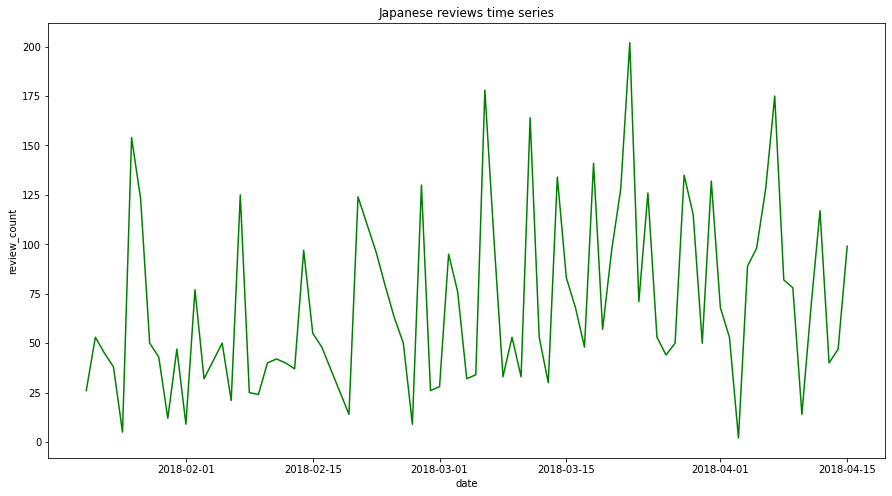

In [17]:
# import file into pandas dataframe:
reviews = pd.read_csv('JapaneseReviews.csv')

#converting the Date column to Datetime objects:
reviews['date'] = pd.to_datetime(reviews['date'])

#setting the index of the data frame to be the Date values to convert the data frame into a series:
reviews.set_index('date', inplace=True)

#verify date is now the index:
display(reviews.head(5))

#plot the data to observe the time series:
plt.figure(figsize = (15,8))
sns.lineplot(x="date", y="review_count", color="green", data=reviews).set_title("Japanese reviews time series")


## Part (b)
### 2 points

Run the Augmented Dickey-Fuller test on the data to determine if the time series is already stationary. You may use the `run_adftest` method provided in lecture.

If the time series is not stationary, state so in an in-line comment, then perform a first-order difference and re-run the test.

In [18]:
from statsmodels.tsa.stattools import adfuller

def run_adftest(s):
    print("Dickey-Fuller Test")
    adftest = adfuller(s, autolag='AIC')
    print(f"Test Statistic: {adftest[0]}")
    print(f"p-value: {adftest[1]}")
    print("Critical Values:")
    for k, v in adftest[4].items():
        print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<adftest[0] else "", 100-int(k[:-1])))

run_adftest(reviews['review_count'])

Dickey-Fuller Test
Test Statistic: -8.241857024449315
p-value: 5.688907118180377e-13
Critical Values:
	1%: -3.5148692050781247 - The data is stationary with 99% confidence
	5%: -2.8984085156250003 - The data is stationary with 95% confidence
	10%: -2.58643890625 - The data is stationary with 90% confidence


## Part (c)
### 3 points

Plot the auto-correlation function (ACF) to get an indication of what type of ARIMA model may apply to this dataset. Refer to the table below to determine which model is best.

Provide your model choice either in a text cell below or as comments in the code cell alongside your code for the ACF plot. 

Shape | Indicated Model
--- | ---
Exponential, decay to zero | AR - Use PACF plot to identify order
Alternating positive and negative, decaying to zero | AR - Use PACF plot to identify order
One or more spikes, rest are essentially zero  | MA - Order identified by where plot becomes zero
Decay, starting after a few lags | ARMA
All zero or close to zero | Data is essentially random
High values at fixed intervals | Include seasonal autoregressive term / difference
No decay to zero | The series is not stationary

<BarContainer object of 51 artists>

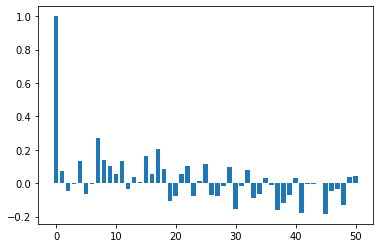

In [19]:
from statsmodels.tsa.stattools import acf

autocorr = acf(reviews, nlags=50)
plt.bar(range(len(autocorr)), autocorr)

#Shape Alternating positive and negative, decaying to zero
#Model choice: AR - Use PACF plot to identify order

## Part (d)
### 3 points

If you chose a model in part (c) that calls for use of ARIMA, use the ADF test, ACF plot, and PACF plots to determine the values of p, d, and q. Train an ARIMA model on these parameters and plot the results as shown in lecture.

If you determined in part (c) that the data is essentially random, then calculate and output the mean of the time series. (The best prediction that can be made from a time series with random values is its mean. There is no point in attempting to create a model for random data.)

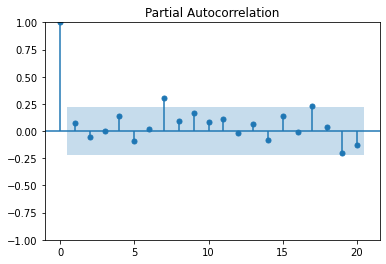

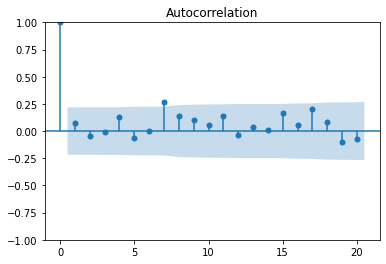

In [20]:
import warnings
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.simplefilter(action='ignore', category=FutureWarning)

#PACF plot:
plot_pacf(reviews, lags=20);

#ACF plot:
plot_acf(reviews, lags=20);

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604:

MSE:  1591.342


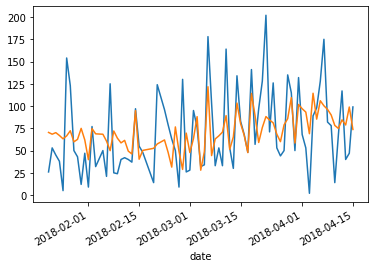

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p = 7
d = 0
q = 7

train_data = reviews['review_count'] # Diff will be applied by ARIMA

# Train the model and get predictions
model = ARIMA(train_data, order=(p, d, q)).fit()
predictions = model.predict(start=d, typ='levels') # 'levels' keeps original scaling when differencing is used!

# Compute error
mse = mean_squared_error(train_data.iloc[d:], predictions)

# Plot results
scaled_predictions = pd.Series(predictions, copy=True) # convert to Series

reviews.review_count.plot()
scaled_predictions.plot()

print(f"MSE:  {mse:.3f}")

# Question 6 - Machine Learning

This question utilizes the [Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/Mushroom) provided by University of California, Irvine. 

The dataset contains a bunch of features regarding a sample of mushrooms labeled as either `p` for poisonous or `e` for edible. The objective is to design a classifier that will discern between poisonous and edible mushrooms.

## Part (a)
### 3 points

Download the `mushrooms.csv` file from Canvas and place it in your local repository. Import the data into a Pandas DataFrame. 

In order for the `score` mechanism to work properly, the `'class'` labels must be integer values. Replace `p` with the value 1 and `e` with the value 0. This means we are viewing `p` (poisonous) as the positive label and `e` (edible) as the negative label.

Print the head of the dataset to confirm the data has been imported and the `'class'` column has been edited appropriately.

In [22]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom = mushroom.replace(to_replace={'class': {"p": 1, "e": 0}}, value=None)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,e,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,e,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Part (b)
### 3 points

It should be clear that every column in this dataset is categorical. In order for us to use these features in machine learning models, we must convert them to continuous features. Here we do so using one-hot encodings.

Separate the dataset in the feature matrix X (all columns except `'class'`) and target vector y (just the column `'class'`). Use `pd.get_dummies` to convert X into a matrix of one-hot encodings instead of categorical features.

After extracting X and y, use `train_test_split` to split the data into training and test sets. Since the data is split randomly, to keep your results consistent, set `random_state=0` when calling `train_test_split`.

In [23]:
y= mushroom['class']

# Already continuous features are untouched
# The original categorical features are replaced with their dummy versions
X = pd.get_dummies(mushroom.drop('class', axis=1)) # Ignore target values

print(X.shape)
X.head()

(8124, 118)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Part (c)
### 2 points

Let's see how well a simple classifier can do on this one-hot encoded data set. Instantiate a `GaussianNB` classifier, fit it on the training set, and output the `score` based on the classifier's predictions on the test set. 

You may find that you have to reshape the predictions vector using `reshape(-1,1)` in order to compute the score.

In [25]:
# Fit and test model
model = GaussianNB() #instantiate model object
model.fit(X_train, y_train) #fit model to the training data
print(model.score(X_test, y_test))

0.96602658788774


## Part (d)
### 3 points

One possible reason why the score is not particularly good is because there are so many features, particularly due to the one-hot encoding. Use the `SelectPercentile` class to get the top 30% of features based on statistical significance. Ensure that the resulting training set has notably fewer features by printing the shape of the original training set X and the transformed training set X.

In addition, output the features that `SelectPercentile` ended up choosing as the most important features.

In [26]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=30) 
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

# Output how many features were chosen
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_selected.shape: {X_train_selected.shape}")


X_train.shape: (6093, 118)
X_train_selected.shape: (6093, 36)


,bruises_f,bruises_t,odor_f,odor_l,odor_n,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,...,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_w,population_a,population_n,population_v,habitat_p
5832,1,0,1,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
601,0,1,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
1601,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
4941,1,0,1,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,1
7492,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3264,1,0,1,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
1653,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2607,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


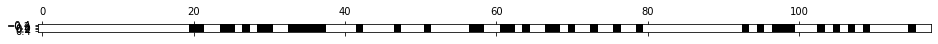

In [27]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

#output the features that SelectPercentile ended up choosing as the most important features:
# Create Pandas DataFrame of X_train
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
# Select most significant columns in terms of matching target values
X_train_df.loc[:, select.get_support()]

## Part (e)
### 2 points

With most of the features discarded, train a new `GaussianNB` classifier based on the selected features in the training set. Transform the test set to also contain only the selected features, then output the resulting score. You should find that the score is not better than the classifier that was trained on all features.

In [28]:
from sklearn.naive_bayes import GaussianNB

classif = GaussianNB()

classif.fit(X_train, y_train)
print(f"Score with all features: {classif.score(X_test, y_test):.3f}")

X_test_selected = select.transform(X_test)
classif.fit(X_train_selected, y_train)
print(f"Score with select features: {classif.score(X_test_selected, y_test):.3f}")

Score with all features: 0.966
Score with select features: 0.926


## Part (f)
### 2 points

To provide a more robust evaluation of this model, we should use cross-validation. Since this classifier is "naive" (meaning it is a relatively simple model), it should perform better if provided more of the overall data as training. As such, it is probably better to use 10-fold cross-validation.

Perform a stratified 10-fold cross-validation of the new classifier that is based on the selected features. Output the 10 scores produced by the cross-validation along with the mean of the 10 scores.

In [29]:
from sklearn.model_selection import cross_val_score 

nb = GaussianNB()

scores = cross_val_score(nb, X_test_selected, y_test, cv=10) 

print(f"Cross-validation scores: {scores}")
print(f"Cross-validation mean: {np.mean(scores):.3f}")

Cross-validation scores: [0.89215686 0.91133005 0.92610837 0.95566502 0.93103448 0.92610837
 0.92610837 0.95073892 0.90147783 0.93596059]
Cross-validation mean: 0.926


## Part (g)
### 4 points

Assuming 1 ("poisonous") is our positive label and 0 ("edible") is our negative label, consider the two types of errors that can occur with this binary classification. What would the consequences be of a false positive? How about false negative? Answer these questions in an in-line comment or as a separate text cell.

Based on your answer, determine if precision, recall, or f1-score would be the best metric to base our model on. Compute and output the chosen metric score.

______________________
* A false positive would be a mushroom that the model classified as poisonous, but was actually edible.  The consequence of a false positive is not serious, because the model labeled the safe mushroom as poisonous.  Someone would likely not consume this incorrectly labeled mushroom that is actually safe to eat. 

* A false negative would be a mushroom that the model classified as edible, but was actually poisonous.  The consequence of a false negative is much more severe, because it could lead to a serious outcome if someone ate a mushroom that the model classified as safe but was not.  

* The best metric to base our model on is recall because we want to minimize false negatives. 

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

predicted= model.predict(X_test)

#compute recall:

confusion_matrix(y_test, predicted) 
print(f"Recall: {recall_score(predicted, y_test)}")

Recall: 0.933589990375361


# Question 7 - Reflection

### 5 points

This course, Data Science Tools I, has covered a number of different topics that have hopefully enlightened you to what you can possibly do with data science. It is my (Terron's) belief that tools of such power and significance should be wielded and used for the greater good. Yes, data scientists can make a lot of money and being financially stable is a key facet of living a comfortable lifestyle. But ultimately to me, the greatest fulfillment I get from my job and my past occupations is the positive impact I can have on others and on society.

How do you think you will utilize the tools you have learned? What problems exist in the world that you would like answers to? Are there any populations of interest to you that could be better understood or better represented publicly? What concerns you about how statistics are presented or could be used for or against certain people? Why study data science? What careers might you consider going into that utilize these tools?

You do not have to answer all of these questions. I am mostly looking for a general reflection from you on data science as a whole. I know we've only scratched the surface of many of these subjects and there is plenty more to learn, but I would like to get your overall thoughts on the course, what you've learned, what you can do with what you've learned, etc.

While you are welcome to answer this directly in a paragraph or two, you are encouraged to be creative in how you answer. You could write a haiku, a limerick, draw a comic or a picture, whatever medium best allows you to express yourself. If you need to attach another file to your submission as a result, zip the extra file(s) with your notebook and submit the zipped files to Canvas.


_______________________________

* I would like to utilize the data science tools I have learned in the healthcare space.  Specifically, I want to work on technology that supports caregivers and patients.  People who are in a hospital or emergency room are vulnerable and depend on accurate, consistent information.  I believe that there are opportunities to improve communications in these settings.  For example, I have always thought that once an admission or discharge order is placed, patients could get updates about what to expect next, and when.  Knowing where a someone is in their care journey can help alliviate anxiety for patients and their families. 

* In this course, it was really nice to be exposed to time series analysis.  I saw how the data scientists that I work with used this technique to help plan for covid-19 surges.  This helped hospitals secure personal protective equipment, plan for staffing shortages, and develop a system-wide response to the pandemic.  I was inspired that I could someday use data to help support these efforts in the future. I also really enjoyed the exposure to machine learning. 